# OpenSMILE Analysis
This notebook loads OpenSMILE csv- data, cleans and plots it

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import nltk

## Load .csv data with results of OpenSMILE Analysis
First we load .csv data and clean it (removing of NaNs), then we store information of all files in seperate panda dataframes containing information about affect, emotion and valence/arousal for all participants.

In [17]:
# Get Filenames to iterate
filenames = listdir('C:\\Users\\user\\OpenSMILE_Data')

#Create python lists which store results
arousal = []
valence = []
emotion = []
affect = []
characterIDs = []

fnames = []
for x in filenames:
    fnames.append([x])

for i in range(len(fnames)):
     # data contains all information (arousal, valence, emotion, affect) and we want to save the values of all files in a list
    data = pd.read_csv("OpenSMILE_Data/" + filenames[i])    
    
    # Additionally we want to save the labels of emotion and affect, since they represent different categories
    # This step only has to be executed once, since the labels do not change between the .csv files
    if i == 0:       
        emotion_label = data['emodbEmotion_LABEL']
        affect_label = data['abcAffect_LABEL']
        affect_label = affect_label.dropna()
  
    # For arousal, valence and affect we have to drop nans, since they have less values than emotion
    temp_arousal = data['arousal']
    temp_arousal = temp_arousal.dropna()
    temp_valence = data['valence'] 
    temp_valence = temp_valence.dropna()
    temp_affect = data['abcAffect']
    temp_affect = temp_affect.dropna()
    temp_emotion = data['emodbEmotion']  
    characterIDs.append(fnames[i][0][0])
    
    #Append the temp values to 'global lists'
    emotion.append(temp_emotion.values.tolist())
    affect.append(temp_affect.values.tolist())
    valence.append(temp_valence.values)
    arousal.append(temp_arousal.values)

#We want to have the labels as column seperators and the filenames as ID 
#We want to do this, so that if we add more files (at the moment only 6 .csv files are loaded) we want to add rows and not columns
#If we plot the data, emotion_label can be used as label
df_emotion = pd.DataFrame.from_records(emotion)
#df_emotion.index = filenames
df_emotion.columns = emotion_label
df_emotion['CharacterID'] = characterIDs
df_emotion['file'] = filenames

#Now do the same for affect
df_affect = pd.DataFrame.from_records(affect)
#df_affect.index = filenames

df_affect.columns = affect_label
df_affect['CharacterID'] = characterIDs
df_affect['file'] = filenames

#For Arousal and Valence, we want to combine these two features so that we can draw a scatter plot in the arousal valence space
np_ar = np.array(arousal).ravel()
np_val = np.array(valence).ravel()
np_ar_val = np.array([np_ar, np_val])

#Transpose Matrix so that it is in the same form as affect and emotion (columns = arousal, valence, ID = Filename)
df_ar_val = pd.DataFrame.from_records(np_ar_val.T)
#df_ar_val.index = filenames
df_ar_val.columns = ['valence', 'arousal']
df_ar_val['CharacterID'] = characterIDs
df_ar_val['file'] = filenames
df_affect

abcAffect_LABEL,aggressiv,cheerful,intoxicated,nervous,neutral,tired,CharacterID,file
0,0.081552,0.183284,0.578881,0.015480,0.125878,0.014925,0,0_a.csv
1,0.066032,0.164758,0.590632,0.022913,0.116829,0.038837,0,0_b.csv
2,0.056913,0.358711,0.100918,0.033772,0.278887,0.170799,1,1_a.csv
3,0.118871,0.299684,0.439178,0.021521,0.082268,0.038479,1,1_b.csv
4,0.101005,0.248957,0.150841,0.022334,0.030162,0.446700,2,2_a.csv
5,0.215405,0.438105,0.146177,0.026726,0.037131,0.136457,2,2_b.csv



## Now that we have our Panda Dataframes we can go ahead and have a look at the data by plotting it

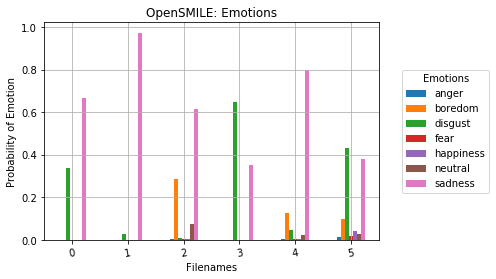

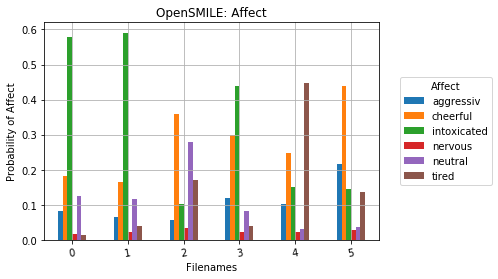

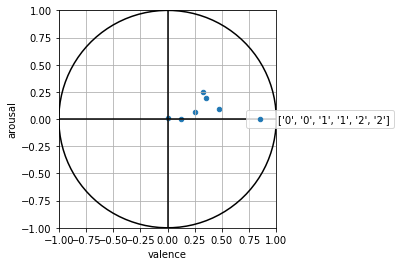

In [18]:
# Start with Emotion
ax_emo = df_emotion.plot.bar(title = 'OpenSMILE: Emotions', rot = 10) #We set rotation to 10 so that the filenames can be read
ax_emo.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Emotions')
ax_emo.set_ylabel('Probability of Emotion')
ax_emo.set_xlabel('Filenames')
plt.grid(True)

#Same for Affect
ax_aff = df_affect.plot.bar(title = 'OpenSMILE: Affect', rot = 10)
ax_aff.legend(loc = 'center', bbox_to_anchor=(1.2,0.5), title = 'Affect')
ax_aff.set_ylabel('Probability of Affect')
ax_aff.set_xlabel('Filenames')
plt.grid(True)

#Now plot Arousal-Valence data in arousal valence space

#Try to get the legen to display the filenames (Not working yet)
fnames = []
for x in filenames:
    fnames.append([x])
    
ax_ar_val = df_ar_val.plot.scatter(x = 'valence', y = 'arousal', label = characterIDs)

#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax_ar_val.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax_ar_val.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax_ar_val.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax_ar_val.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
ax_ar_val.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)


## Let's load information about the speakers
The speaker ID is saved in a single .csv file containing four important columns: ID, Age, Sex and Acadedmic Status. Since before loaded OpenSMILE csv files are named using the corresponding index (ex. speaker with id 0 has two files 0_a.csv and 0_b.csv), so that a link can be created

In [26]:
char_data = pd.read_csv("CharacterData/CharacterIDs.csv")    

#Join above tables and Character Tables

#To Join DataFrames we have to cast the column on which we want to join to int, so that both columns have the same data type
char_data['CharacterID'] = char_data['CharacterID'].astype(int)
df_ar_val['CharacterID'] = df_ar_val['CharacterID'].astype(int)
df_emotion['CharacterID'] = df_emotion['CharacterID'].astype(int)
df_affect['CharacterID'] = df_affect['CharacterID'].astype(int)

#Safe new data frames
df_ar_val_char = df_ar_val.merge(char_data, how = 'left', left_on='CharacterID', right_on='CharacterID')
df_emotion_char = df_emotion.merge(char_data, how = 'left', left_on='CharacterID', right_on= 'CharacterID')
df_affect_char = df_affect.merge(char_data, how = 'left', left_on='CharacterID', right_on= 'CharacterID')


,aggressiv,cheerful,intoxicated,nervous,neutral,tired,CharacterID,file,Age,Sex,Academic Status
0,0.081552,0.183284,0.578881,0.015480,0.125878,0.014925,0,0_a.csv,25,0,1
1,0.066032,0.164758,0.590632,0.022913,0.116829,0.038837,0,0_b.csv,25,0,1
2,0.056913,0.358711,0.100918,0.033772,0.278887,0.170799,1,1_a.csv,24,1,1
3,0.118871,0.299684,0.439178,0.021521,0.082268,0.038479,1,1_b.csv,24,1,1
4,0.101005,0.248957,0.150841,0.022334,0.030162,0.446700,2,2_a.csv,23,0,0
5,0.215405,0.438105,0.146177,0.026726,0.037131,0.136457,2,2_b.csv,23,0,0


## Now let's have another look at the plots using the character data
First let's take a look at female/male

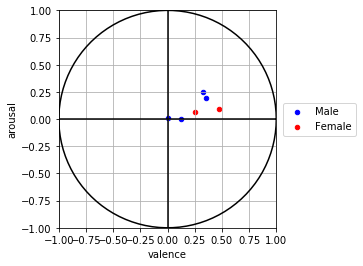

In [40]:
df_ar_val_male = df_ar_val_char.loc[df_ar_val_char['Sex'] == 0]
df_ar_val_female = df_ar_val_char.loc[df_ar_val_char['Sex'] == 1]

df_emotion_char_male = df_emotion_char.loc[df_emotion_char['Sex'] == 0]
df_emotion_char_female = df_emotion_char.loc[df_emotion_char['Sex'] == 1]

df_affect_char_male = df_affect_char.loc[df_affect_char['Sex'] == 0]
df_affect_char_female = df_affect_char.loc[df_affect_char['Sex'] == 1]

ax1 = df_ar_val_male.plot.scatter(x = 'valence', y = 'arousal', label = 'Male', c = 'b')
ax2 = df_ar_val_female.plot.scatter(x = 'valence', y = 'arousal', label = 'Female', c = 'r', ax=ax1)
#We want to plot the arousal valence circle so we create values for it
t = np.linspace(0,np.pi*2,100)
ax1.plot(np.cos(t), np.sin(t), linewidth = 1.5, color = 'black')
ax1.axvline(0,0,1, c = 'black')
x_coord = [-1.0,1.0]
y_coord = [0.0,0.0]
ax1.plot(x_coord, y_coord, c = 'black')

#Make Plot pretty
ax1.legend(loc = 'center', bbox_to_anchor=(1.2,0.5))
plt.grid(True)
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
ax1.set_aspect('equal')
plt.locator_params(axis='x',nbins= 9)